<a href="https://colab.research.google.com/github/paulo-amaral/COVID-DASH/blob/master/covid-dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import date
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

In [ ]:
def data_visualization(filename, countries, pop, number, date1, date2):
    """filename= 'Confirmed' or 'Fatality'
    countries=country_list,
    pop= 'absolute', 'inhabitants', 'area'
    number= 1000000 inhabitants or 10000 km2 area
    date1= start date
    date2= end date
    """    

    if filename == 'Fatality': fn='time_series_covid19_deaths_global.csv'
    elif filename == 'Confirmed': fn='time_series_covid19_confirmed_global.csv'
    elif filename == 'Recovered': fn='time_series_covid19_recovered_global.csv'
    else: print('Wrong input for filename')

    if pop == 'area': per, ent='per','km2'
    elif pop == 'inhabitants': per,ent='per','persons'
    elif pop == 'normal': number, per, ent='','',''
    else: ent='persons', print('Wrong input for pop')
    
    title=str(filename)+' cases'+' '+str(per)+' '+str(number)+' '+str(ent)
        
    dat1 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'+fn)
    dat2 = pd.read_csv('https://raw.githubusercontent.com/paulo-amaral/COVID-DASH/master/countries.csv')     
    dat1 = dat1[(dat1['Country/Region'].isin(countries)) & (dat1['Province/State'].isin([np.nan*len(country_list)]))]
    dat1 = pd.melt(dat1.drop(['Lat', 'Long', 'Province/State'], axis=1), id_vars = ['Country/Region'])
    dat1 = dat1.rename({'variable':'date', 'value':'metric'}, axis=1)
    dat1['date']=pd.to_datetime(dat1['date'])
    dat = pd.merge(dat1, dat2, on=['Country/Region'])
    dat = dat.sort_values(by='date', ascending=True)
    
    if pop == 'area' or pop == 'inhabitants': 
        dat[pop] = dat[pop].div(number)
        dat['yvalue'] = dat['metric'].div(dat[pop])
    else: dat['yvalue'] = dat['metric'].copy() 
    
    dat = dat[(dat['date']>=date1) & (dat['date']<=date2)]
    colors = mpl.cm.tab20(np.linspace(0,1,len(countries)))
    plt.figure(figsize = (16, 8))

    countries = list(dat.loc[(dat['Country/Region'].isin(countries)) & (dat['date']==dat['date'].max()), ['Country/Region', 'yvalue']].sort_values(by='yvalue', ascending=False)['Country/Region'])
    
    for i,j in zip(countries, np.arange(0,len(countries))):
        plt.plot(dat[dat['Country/Region'] == i]['date'], dat[dat['Country/Region'] == i]['yvalue'], label=i, marker='o', color=colors[j])
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of '+filename+' Cases')
    plt.title(title, fontsize=16)
   
    plt.legend()
    plt.savefig('covid.png')
    

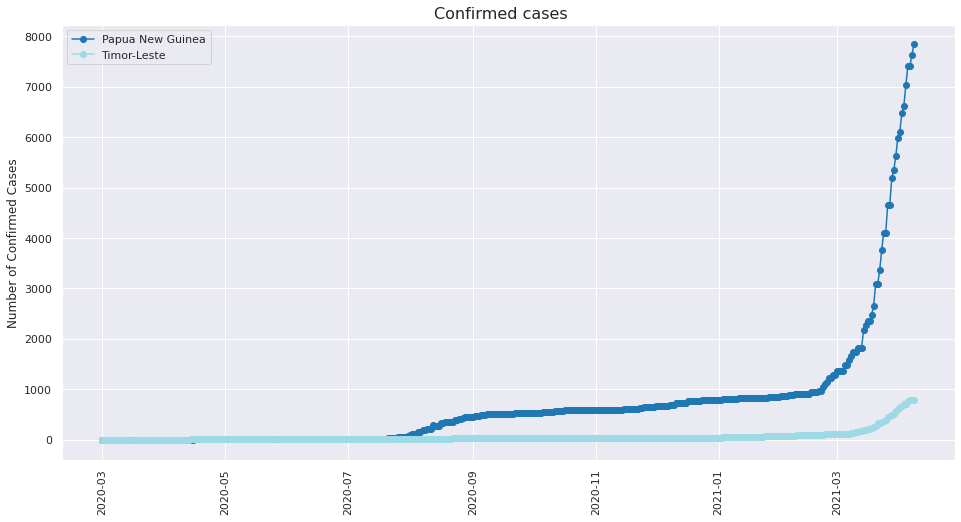

In [ ]:
country_list = ['Timor-Leste', 'Papua New Guinea']
data_visualization('Confirmed', country_list, 'normal', np.nan, '2020-03-01', pd.to_datetime(date.today()))


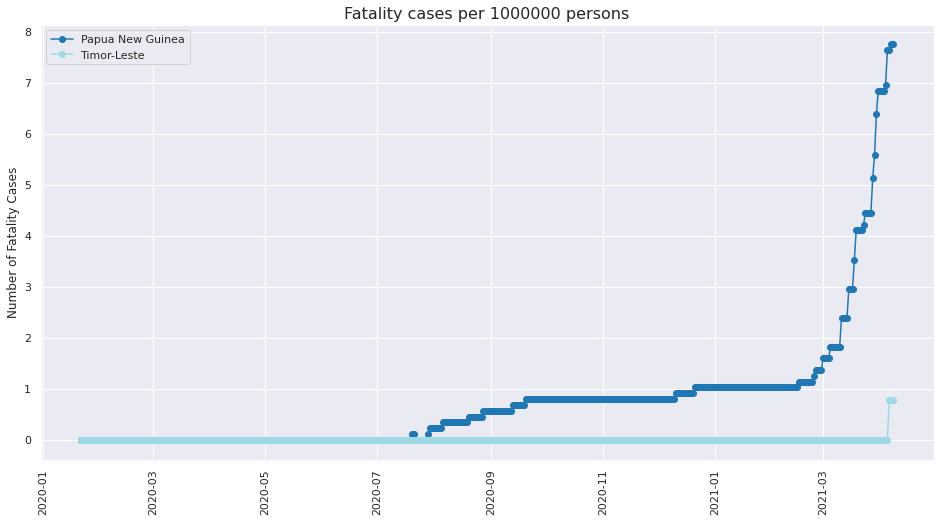

In [ ]:
data_visualization('Fatality', country_list, 'inhabitants', 1000000, '2020-01-01', pd.to_datetime(date.today()))
